### B 3.3 $-$ Reichweite von $\alpha$-Teilchen

In [1]:
using Plots
using LaTeXStrings

In [2]:
function rechnerischeGeradenanpassung(xValues, yValues)
    if length(xValues) != length(yValues)
        return 0
    elseif length(xValues) <= 2
        return 0
    else
        N = length(xValues)
    end
    
    x = 0 # [x]
    y = 0 # [y]
    xx = 0 # [xx]
    xy = 0 # [xy]
    
    for i in 1:N
        x += xValues[i]
        y += yValues[i]
        xx += xValues[i]^2
        xy += xValues[i] * yValues[i]
    end
    Δ = N * xx - x * x
    
    a = (N * xy - x * y) / Δ
    b = (xx * y - x * xy) / Δ
    
    Δy = 0
    for i in 1:N
        Δy += (a * xValues[i] + b - yValues[i])^2
    end
    Δy_hoch2 = Δy * 1 / (N-2)
    
    Δa = sqrt(Δy_hoch2 * N / Δ)
    Δb = sqrt(Δy_hoch2 * xx / Δ)
    
    return a, b, Δa, Δb
end

rechnerischeGeradenanpassung (generic function with 1 method)

#### Vorbereitung: Abschätzung Anzahl Stöße der $\alpha$-Teilchen

In [3]:
5.486*10^6/14.53

377563.66139022715

#### Auswertungsteil $-$ 4.1 Reichweiten

##### 1. Zählratenkurven, 2. gegen Impulshöhe 0 extrapolierte Impulshöhenkurven:

In [4]:
Δp = 10 # mbar
# 1. Abstand R_1 = 19 mm
p1 = [100, 300, 500, 700, 800, 860, 890, 900, 920] # mbar
rate1 = [7059/30, 7172/30, 7117/30, 7080/30, 7203/30, 6973/30, 8676/60, 6118/90, 1113/120] # 1/s
Δrate1 = [1/sqrt(7059), 1/sqrt(7172), 1/sqrt(7117), 1/sqrt(7080), 1/sqrt(7203), 1/sqrt(6973), 1/sqrt(8676),
    1/sqrt(6118), 1/sqrt(1113)]
spannung1 = [7.4, 6.2, 4.8, 3.2, 2.3, 1.5, 1.1, 0.9, 0.4] # V
Δspannung1 = [0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.4] # V

# 2. Abstand R_2 = 21 mm
p2 = [100, 300, 500, 700, 780, 800, 820, 840, 860, 880, 900] # mbar
rate2 = [6636/30, 6516/30, 6601/30, 6433/30, 6262/30, 6510/30, 6360/30, 6192/30, 6690/60, 1434/120, 0/20] # 1/s
Δrate2 = [1/sqrt(6636), 1/sqrt(6516), 1/sqrt(6601), 1/sqrt(6433), 1/sqrt(6262), 1/sqrt(6510), 1/sqrt(6360),
    1/sqrt(6192), 1/sqrt(6690), 1/sqrt(1434), 0]
spannung2 = [7.3, 6.1, 4.5, 2.7, 1.8, 1.0, 1.2, 0.9, 0.5, 0.4, 0.2] # V
Δspannung2 = [0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.4, 0.4, 0.4, 0.3, 0.2] # V

# 2. Abstand R_2 = 22 mm
p3 = [100, 300, 500, 700, 740, 760, 800, 820, 840, 860] # mbar
rate3 = [6402/30, 6170/30, 6358/30, 6284/30, 6311/30, 6159/30, 6220/30, 5826/30, 4812/60, 1201/120] # 1/s
Δrate3 = [1/sqrt(6402), 1/sqrt(6170), 1/sqrt(6358), 1/sqrt(6284), 1/sqrt(6311), 1/sqrt(6159), 1/sqrt(6220),
    1/sqrt(5826), 1/sqrt(4812), 1/sqrt(1201)]
spannung3 = [7.2, 6.0, 4.6, 2.6, 2.2, 1.9, 1.3, 1.0, 0.6, 0.4] # V
Δspannung3 = [0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3] # V

# 2. Abstand R_2 = 30 mm
p4 = [100, 200, 300, 400, 500, 600, 640, 680, 700, 720] # mbar
rate4 = [8962/60, 9024/60, 8962/60, 8806/60, 8916/60, 9079/60, 8818/60, 8547/60, 5769/60, 332/120] # 1/s
Δrate4 = [1/sqrt(8962), 1/sqrt(9024), 1/sqrt(8962), 1/sqrt(8806), 1/sqrt(8916), 1/sqrt(9079), 1/sqrt(8818),
    1/sqrt(8547), 1/sqrt(5769), 1/sqrt(332)]
spannung4 = [7.2, 6.4, 5.6, 4.7, 3.8, 2.6, 1.9, 1.3, 1.0, 0.4] # V
Δspannung4 = [0.1, 0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3] # V
;

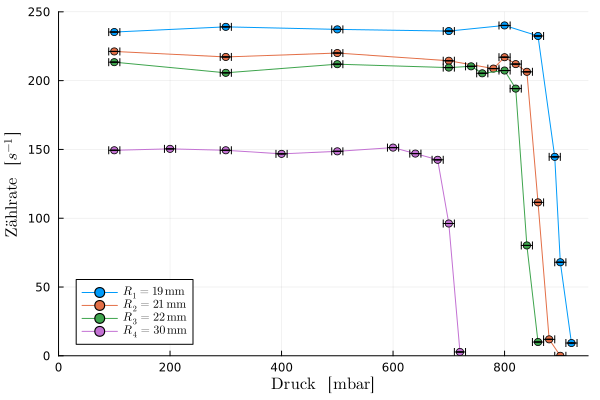

In [5]:
zählratenkurven = plot(p1, rate1, xerr = Δp, yerr = Δrate1, label = L"R_1 = 19 \mathrm{\, mm}", legend =:bottomleft, markershape=:circle,
    #title = L"\mathrm{Zählratenkurven}",
    ylims = (0,250), xlims = (0,950))
plot!(p2, rate2, xerr = Δp, yerr = Δrate2, label = L"R_2 = 21 \mathrm{\, mm}", markershape=:circle)
plot!(p3, rate3, xerr = Δp, yerr = Δrate3, label = L"R_3 = 22 \mathrm{\, mm}", markershape=:circle)
plot!(p4, rate4, xerr = Δp, yerr = Δrate4, label = L"R_4 = 30 \mathrm{\, mm}", markershape=:circle)

xlabel!(L"\mathrm{Druck}\quad [\mathrm{mbar}]")
ylabel!(L"\mathrm{Zählrate}\quad [s^{-1}]")

In [6]:
savefig(zählratenkurven, "../../media/B3.3/zaehlratenkurven.svg");
savefig(zählratenkurven, "../../media/B3.3/zaehlratenkurven.pdf");

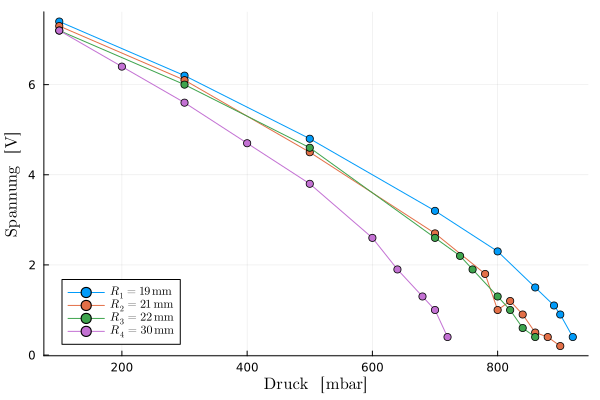

In [7]:
plot(p1, spannung1, label = L"R_1 = 19 \mathrm{\, mm}", markershape=:circle,
    #title = L"\mathrm{Impulshöhenkurven\ ohne\ Fehler}",
    legend=:bottomleft)
plot!(p2, spannung2, label = L"R_2 = 21 \mathrm{\, mm}", markershape=:circle)
plot!(p3, spannung3, label = L"R_3 = 22 \mathrm{\, mm}", markershape=:circle)
plot!(p4, spannung4, label = L"R_4 = 30 \mathrm{\, mm}", markershape=:circle)

xlabel!(L"\mathrm{Druck}\quad [\mathrm{mbar}]")
ylabel!(L"\mathrm{Spannung}\quad [\mathrm{V}]")

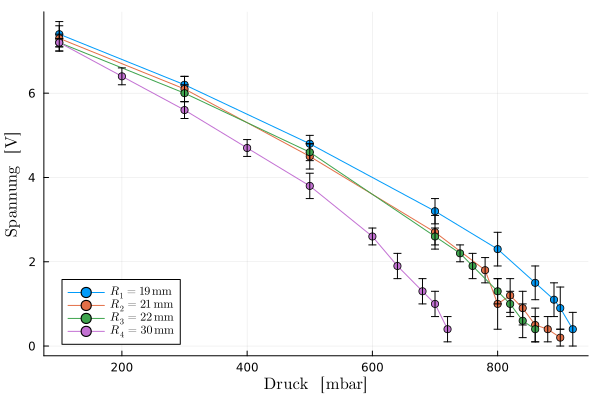

In [8]:
plot(p1, spannung1, yerr = Δspannung1, label = L"R_1 = 19 \mathrm{\, mm}", markershape=:circle,
    #title = L"\mathrm{Impulshöhenkurven\ mit\ Spannungsfehlern}",
    legend=:bottomleft)
plot!(p2, spannung2, yerr = Δspannung2, label = L"R_2 = 21 \mathrm{\, mm}", markershape=:circle)
plot!(p3, spannung3, yerr = Δspannung3, label = L"R_3 = 22 \mathrm{\, mm}", markershape=:circle)
plot!(p4, spannung4, yerr = Δspannung4, label = L"R_4 = 30 \mathrm{\, mm}", markershape=:circle)

xlabel!(L"\mathrm{Druck}\quad [\mathrm{mbar}]")
ylabel!(L"\mathrm{Spannung}\quad [\mathrm{V}]")

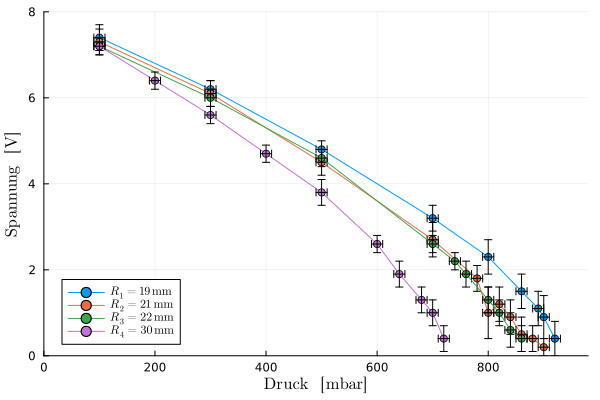

In [9]:
spannungskurven = plot(p1, spannung1, xerr = Δp, yerr = Δspannung1, label = L"R_1 = 19 \mathrm{\, mm}", markershape=:circle,
    #title = L"\mathrm{Impulshöhenkurven\ mit\ beiden\ Fehlern}",
    legend=:bottomleft, ylims = (0,8), xlims = (0,980))
plot!(p2, spannung2, xerr = Δp, yerr = Δspannung2, label = L"R_2 = 21 \mathrm{\, mm}", markershape=:circle)
plot!(p3, spannung3, xerr = Δp, yerr = Δspannung3, label = L"R_3 = 22 \mathrm{\, mm}", markershape=:circle)
plot!(p4, spannung4, xerr = Δp, yerr = Δspannung4, label = L"R_4 = 30 \mathrm{\, mm}", markershape=:circle)

xlabel!(L"\mathrm{Druck} \quad [\mathrm{mbar}]")
ylabel!(L"\mathrm{Spannung} \quad [\mathrm{V}]")

In [10]:
savefig(spannungskurven, "../../media/B3.3/spannungskurven.svg");
savefig(spannungskurven, "../../media/B3.3/spannungskurven.pdf");

##### $\Rightarrow$ $\bar{R}$ zu $1/\bar{p}$ Gerade:

##### Nullstellen durch Extrapolation bestimmen => Reichweite zu inversem Druck Gerade
1. Aus Zählratenkurve, 2. Aus Impulshöhenkurve

Rechnerische Geradenanpassung:

Nullstellen von 1. und 2. bestimmen durch Extrapolation:

1.

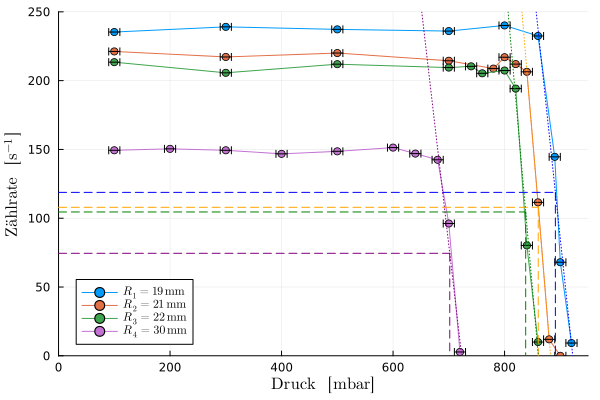

In [11]:
# Gerade über die letzten 3/4 Messwerte:
# R_1: Letzte 4 Messwerte
xWerte1 = [p1[length(p1)-3], p1[length(p1)-2], p1[length(p1)-1], p1[length(p1)]]
yWerte1 = [rate1[length(rate1)-3], rate1[length(rate1)-2], rate1[length(rate1)-1], rate1[length(rate1)]]
a1, b1, Δa1, Δb1 = rechnerischeGeradenanpassung(xWerte1, yWerte1)
gerade1(x) = a1 * x + b1
nullstelle1 = -b1/a1

#R_2: Nicht der letzte aber die 3 davor
xWerte2 = [p2[length(p2)-3], p2[length(p2)-2], p2[length(p2)-1]]
yWerte2 = [rate2[length(rate2)-3], rate2[length(rate2)-2], rate2[length(rate2)-1]]
a2, b2, Δa2, Δb2 = rechnerischeGeradenanpassung(xWerte2, yWerte2)
gerade2(x) = a2 * x + b2
nullstelle2 = -b2/a2

# R_3: Letzte 3 Messwerte
xWerte3 = [p3[length(p3)-2], p3[length(p3)-1], p3[length(p3)]]
yWerte3 = [rate3[length(rate3)-2], rate3[length(rate3)-1], rate3[length(rate3)]]
a3, b3, Δa3, Δb3 = rechnerischeGeradenanpassung(xWerte3, yWerte3)
gerade3(x) = a3 * x + b3
nullstelle3 = -b3/a3

# R_4: Letzte 3 Messwerte
xWerte4 = [p4[length(p4)-2], p4[length(p4)-1], p4[length(p4)]]
yWerte4 = [rate4[length(rate4)-2], rate4[length(rate4)-1], rate4[length(rate4)]]
a4, b4, Δa4, Δb4 = rechnerischeGeradenanpassung(xWerte4, yWerte4)
gerade4(x) = a4 * x + b4
nullstelle4 = -b4/a4

zählrateExtrapoliert = plot(p1, rate1, label = L"R_1 = 19 \mathrm{\, mm}", legend =:bottomleft, markershape=:circle,
    #title = L"\mathrm{Zählratenkurven\ mit\ Geradenanpassung}",
    xlim = (0,950), ylim = (0,250), xerr=Δp)
plot!(p2, rate2, xerr=Δp, label = L"R_2 = 21 \mathrm{\, mm}", markershape=:circle)
plot!(p3, rate3, xerr=Δp, label = L"R_3 = 22 \mathrm{\, mm}", markershape=:circle)
plot!(p4, rate4, xerr=Δp, label = L"R_4 = 30 \mathrm{\, mm}", markershape=:circle)

r_mittel1 = (rate1[1] + rate1[2] + rate1[3] + rate1[4] + rate1[5])/(5*2)
Δr_mittel1 = sqrt((1/5*4) * ((0.5*rate1[1]-r_mittel1)^2 + (0.5*rate1[2]-r_mittel1)^2 + (0.5*rate1[3]-r_mittel1)^2 +
    (0.5*rate1[3]-r_mittel1)^2 + (0.5*rate1[4]-r_mittel1)^2 + (0.5*rate1[5]-r_mittel1)^2)) # Mittelwert-Fehler
mittlereRate1(x) = r_mittel1
p_mittel1 = (r_mittel1 - b1)/a1
Δp_mittel1 = sqrt((Δr_mittel1/a1)^2 + (Δb1/a1)^2 + ((r_mittel1-b1)*Δa1/a1^2)^2) # Gaußsche Fehlerfortpflanzung
plot!(mittlereRate1, [0,p_mittel1], linecolor=:blue, linestyle=:dash, label="")
plot!([p_mittel1, p_mittel1], [r_mittel1, 0], linecolor=:blue, linestyle=:dash, label="")

r_mittel2 = (rate2[1] + rate2[2] + rate2[3] + rate2[4] + rate2[5] + rate2[6] + rate2[7])/(7*2)
Δr_mittel2 = sqrt((1/7*6) * ((0.5*rate2[1]-r_mittel2)^2 + (0.5*rate2[2]-r_mittel2)^2 + (0.5*rate2[3]-r_mittel2)^2 +
    (0.5*rate2[3]-r_mittel2)^2 + (0.5*rate2[4]-r_mittel2)^2 + (0.5*rate2[5]-r_mittel2)^2) +
    (0.5*rate2[6]-r_mittel2)^2 + (0.5*rate2[7]-r_mittel2)^2)
mittlereRate2(x) = r_mittel2
p_mittel2 = (r_mittel2 - b2)/a2
Δp_mittel2 = sqrt((Δr_mittel2/a2)^2 + (Δb2/a2)^2 + ((r_mittel2-b2)*Δa2/a2^2)^2)
plot!(mittlereRate2, [0,p_mittel2], linecolor=:orange, linestyle=:dash, label="")
plot!([p_mittel2, p_mittel2], [r_mittel2, 0], linecolor=:orange, linestyle=:dash, label="")

r_mittel3 = (rate3[1] + rate3[2] + rate3[3] + rate3[4] + rate3[5] + rate3[6] + rate3[7])/(7*2)
Δr_mittel3 = sqrt((1/7*6) * ((0.5*rate3[1]-r_mittel3)^2 + (0.5*rate3[2]-r_mittel3)^2 + (0.5*rate3[3]-r_mittel3)^2 +
    (0.5*rate3[3]-r_mittel3)^2 + (0.5*rate3[4]-r_mittel3)^2 + (0.5*rate3[5]-r_mittel3)^2) +
    (0.5*rate3[6]-r_mittel3)^2 + (0.5*rate3[7]-r_mittel3)^2)
mittlereRate3(x) = r_mittel3
p_mittel3 = (r_mittel3 - b3)/a3
Δp_mittel3 = sqrt((Δr_mittel3/a3)^2 + (Δb3/a3)^2 + ((r_mittel3-b3)*Δa3/a3^2)^2)
plot!(mittlereRate3, [0,p_mittel3], linecolor=:green, linestyle=:dash, label="")
plot!([p_mittel3, p_mittel3], [r_mittel3, 0], linecolor=:green, linestyle=:dash, label="")

r_mittel4 = (rate4[1] + rate4[2] + rate4[3] + rate4[4] + rate4[5] + rate4[6] + rate4[7])/(7*2)
Δr_mittel4 = sqrt((1/7*6) * ((0.5*rate4[1]-r_mittel4)^2 + (0.5*rate4[2]-r_mittel4)^2 + (0.5*rate4[3]-r_mittel4)^2 +
    (0.5*rate4[3]-r_mittel4)^2 + (0.5*rate4[4]-r_mittel4)^2 + (0.5*rate4[5]-r_mittel4)^2) +
    (0.5*rate4[6]-r_mittel4)^2 + (0.5*rate4[7]-r_mittel4)^2)
mittlereRate4(x) = r_mittel4
p_mittel4 = (r_mittel4 - b4)/a4
Δp_mittel4 = sqrt((Δr_mittel4/a4)^2 + (Δb4/a4)^2 + ((r_mittel4-b4)*Δa4/a4^2)^2)
plot!(mittlereRate4, [0,p_mittel4], linecolor=:purple, linestyle=:dash, label="")
plot!([p_mittel4, p_mittel4], [r_mittel4, 0], linecolor=:purple, linestyle=:dash, label="")

plot!(gerade1, label ="", linecolor=:blue, linestyle=:dot)
plot!(gerade2, label ="", linecolor=:orange, linestyle=:dot)
plot!(gerade3, label ="", linecolor=:green, linestyle=:dot)
plot!(gerade4, label ="", linecolor=:purple, linestyle=:dot)

xlabel!(L"\mathrm{Druck} \quad [\mathrm{mbar}]")
ylabel!(L"\mathrm{Zählrate} \quad [\mathrm{s^{-1}}]")

In [12]:
savefig(zählrateExtrapoliert, "../../media/B3.3/zaehlratenkurven extrapoliert.svg");
savefig(zählrateExtrapoliert, "../../media/B3.3/zaehlratenkurven extrapoliert.pdf");

2.

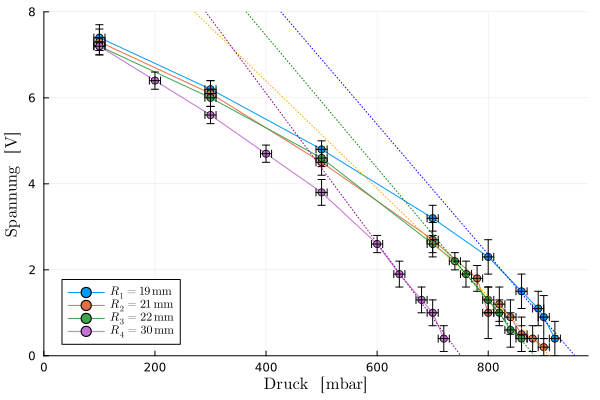

In [13]:
# Gerade über die letzten 5 Messwerte:
# U_1
xWerte1 = [p1[length(p1)-4], p1[length(p1)-3], p1[length(p1)-2], p1[length(p1)-1], p1[length(p1)]]
yWerte1 = [spannung1[length(spannung1)-4], spannung1[length(spannung1)-3], spannung1[length(spannung1)-2],
    spannung1[length(spannung1)-1], spannung1[length(spannung1)]]
a1, b1, Δa1, Δb1 = rechnerischeGeradenanpassung(xWerte1, yWerte1)
gerade1(x) = a1 * x + b1
nullstelle1b = -b1/a1
Δnullstelle1b = sqrt( (Δb1/a1)^2 + (b1*Δa1/a1^2)^2) # Gaußsche Fehlerfortpflanzung

# U_2
xWerte2 = [p2[length(p2)-4], p2[length(p2)-3], p2[length(p2)-2], p2[length(p2)-1], p2[length(p2)]]
yWerte2 = [spannung2[length(spannung2)-4], spannung2[length(spannung2)-3], spannung2[length(spannung2)-2],
    spannung2[length(spannung2)-1], spannung2[length(spannung2)]]
a2, b2, Δa2, Δb2 = rechnerischeGeradenanpassung(xWerte2, yWerte2)
gerade2(x) = a2 * x + b2
nullstelle2b = -b2/a2
Δnullstelle2b = sqrt( (Δb2/a2)^2 + (b2*Δa2/a2^2)^2)

# U_3
xWerte3 = [p3[length(p3)-4], p3[length(p3)-3], p3[length(p3)-2], p3[length(p3)-1], p3[length(p3)]]
yWerte3 = [spannung3[length(spannung3)-4], spannung3[length(spannung3)-3], spannung3[length(rate3)-2],
    spannung3[length(spannung3)-1], spannung3[length(spannung3)]]
a3, b3, Δa3, Δb3 = rechnerischeGeradenanpassung(xWerte3, yWerte3)
gerade3(x) = a3 * x + b3
nullstelle3b = -b3/a3
Δnullstelle3b = sqrt( (Δb3/a3)^2 + (b3*Δa3/a3^2)^2)

# U_4
xWerte4 = [p4[length(p4)-4], p4[length(p4)-3], p4[length(p4)-2], p4[length(p4)-1], p4[length(p4)]]
yWerte4 = [spannung4[length(spannung4)-4], spannung4[length(spannung4)-3], spannung4[length(spannung4)-2],
    spannung4[length(spannung4)-1], spannung4[length(spannung4)]]
a4, b4, Δa4, Δb4 = rechnerischeGeradenanpassung(xWerte4, yWerte4)
gerade4(x) = a4 * x + b4
nullstelle4b = -b4/a4
Δnullstelle4b = sqrt( (Δb4/a4)^2 + (b4*Δa4/a4^2)^2)

spannungskurvenExtrapoliert = plot(p1, spannung1, xerr = Δp, yerr = Δspannung1, label = L"R_1 = 19 \mathrm{\, mm}", markershape=:circle,
    #title = L"\mathrm{Impulshöhenkurven\ mit\ Geradenanpassung}",
    legend=:bottomleft, ylims = (0,8), xlims = (0,980))
plot!(p2, spannung2, xerr = Δp, yerr = Δspannung2, label = L"R_2 = 21 \mathrm{\, mm}", markershape=:circle)
plot!(p3, spannung3, xerr = Δp, yerr = Δspannung3, label = L"R_3 = 22 \mathrm{\, mm}", markershape=:circle)
plot!(p4, spannung4, xerr = Δp, yerr = Δspannung4, label = L"R_4 = 30 \mathrm{\, mm}", markershape=:circle)

plot!(gerade1, label="", linecolor=:blue, linestyle=:dot)
plot!(gerade2, label="", linecolor=:orange, linestyle=:dot)
plot!(gerade3, label="", linecolor=:green, linestyle=:dot)
plot!(gerade4, label="", linecolor=:purple, linestyle=:dot)

xlabel!(L"\mathrm{Druck} \quad [\mathrm{mbar}]")
ylabel!(L"\mathrm{Spannung} \quad [\mathrm{V}]")

In [14]:
savefig(spannungskurvenExtrapoliert, "../../media/B3.3/spannungskurven extrapoliert.svg");
savefig(spannungskurvenExtrapoliert, "../../media/B3.3/spannungskurven extrapoliert.pdf");

Reichweite zu inverser Druck Geraden durch die gerade bestimmten Nullstellen:

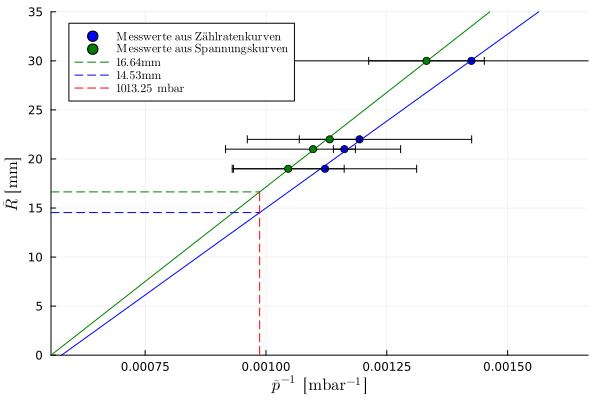

In [15]:
Δx = 0.005/1013.25^2 # 1/mbar (nur Rundungsfehler + Gaußsche Fehlerfortpflanzung)

reichweite1 = [19, 21, 22, 30] # mm
druckInverse1 = [1/p_mittel1, 1/p_mittel2, 1/p_mittel3, 1/p_mittel4] # 1/mbar
ΔpInverse1 = [(1/p_mittel1)^2 * Δp_mittel1, (1/p_mittel2)^2 * Δp_mittel2,
    (1/p_mittel3)^2 * Δp_mittel3, (1/p_mittel4)^2 * Δp_mittel4]
a, b, Δa, Δb = rechnerischeGeradenanpassung(druckInverse1, reichweite1)
gerade1(x) = a*x + b

reichweite2 = [19, 21, 22, 30] # mm
druckInverse2 = [1/nullstelle1b, 1/nullstelle2b, 1/nullstelle3b, 1/nullstelle4b] # 1/mbar
ΔpInverse2 = [(1/nullstelle1b)^2 * Δnullstelle1b, (1/nullstelle2b)^2 * Δnullstelle2b,
    (1/nullstelle3b)^2 * Δnullstelle3b, (1/nullstelle4b)^2 * Δnullstelle4b]
a2, b2, Δa2, Δb2 = rechnerischeGeradenanpassung(druckInverse2, reichweite2)
gerade2(x) = a2*x + b2

reichweiteDruck = plot(gerade1, xlims = (-b2/a2, 1/600), ylims = (0,35),label = "", color=:blue)
scatter!(druckInverse1, xerr = ΔpInverse1, reichweite1, markershape=:circle, legend=:topleft,
    label=L"\mathrm{Messwerte\ aus\ Zählratenkurven}",
    #title = "Reichweite zu inversem Druck",
    color =:blue)
k1 = gerade1(1/1013.25)
Δk1 = sqrt( (Δa*(1/1013.25))^2 + (a*Δx)^2 + (Δb)^2 ) # Gaußsche Fehlerfortpflanzung
f(x) = k1
k1_rounded = round(k1, digits = 2)

plot!(gerade2, label="", color=:green)
scatter!(druckInverse2, xerr = ΔpInverse2, reichweite2, markershape=:circle, legend=:topleft,
    label=L"\mathrm{Messwerte\ aus\ Spannungskurven}", color=:green)
k2 = gerade2(1/1013.25)
Δk2 = sqrt( (Δa2*(1/1013.25))^2 + (a2*Δx)^2 + (Δb2)^2 )
g(x) = k2
k2_rounded = round(k2, digits = 2)

plot!(g, [-b2/a2, 1/1013.25], label = L"%$k2_rounded \mathrm{mm}", linestyle=:dash, linecolor=:green)
plot!(f, [-b2/a2, 1/1013.25], label = L"%$k1_rounded \mathrm{mm}", linestyle=:dash, linecolor=:blue)

plot!([1/1013.25, 1/1013.25], [16.55, 0], label = L"1013.25\enspace \mathrm{mbar}", linestyle=:dash, linecolor=:red)
xlabel!(L"\bar{p}^{-1} \enspace [\mathrm{mbar^{-1}}]")
ylabel!(L"\bar{R} \enspace [\mathrm{mm}]")

In [16]:
savefig(reichweiteDruck, "../../media/B3.3/reichweiten inverse druecke.svg");
savefig(reichweiteDruck, "../../media/B3.3/reichweiten inverse druecke.pdf");

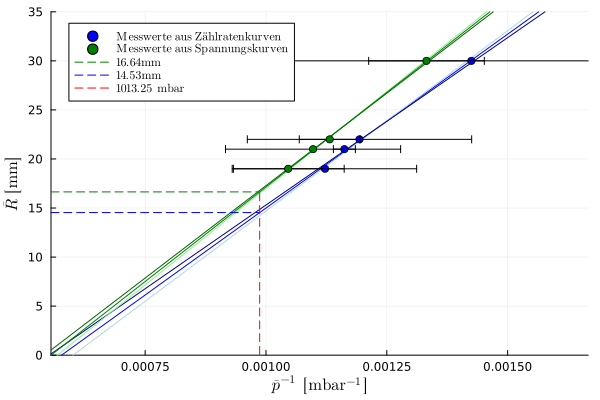

In [17]:
fehlergerade1(x) = (a+Δa)*x + (b-Δb)
fehlergerade2(x) = (a-Δa)*x + (b+Δb)
fehlergerade1b(x) = (a2+Δa2)*x + (b2-Δb2)
fehlergerade2b(x) = (a2-Δa2)*x + (b2+Δb2)

plot(gerade1, xlims = (-b2/a2, 1/600), ylims = (0,35),label = "", color=:blue)

plot!(fehlergerade1, label ="", linecolor=:lightblue)
plot!(fehlergerade2, label ="", linecolor=:darkblue)
plot!(fehlergerade1b, label ="", linecolor=:lightgreen)
plot!(fehlergerade2b, label ="", linecolor=:darkgreen)

scatter!(druckInverse1, xerr = ΔpInverse1, reichweite1, markershape=:circle, legend=:topleft,
    label=L"\mathrm{Messwerte\ aus\ Zählratenkurven}",
    #title = "Reichweite zu inversem Druck",
    color =:blue)
k1 = gerade1(1/1013.25)
f(x) = k1
k1_rounded = round(k1, digits = 2)

plot!(gerade2, label="", color=:green)
scatter!(druckInverse2, xerr = ΔpInverse2, reichweite2, markershape=:circle, legend=:topleft,
    label=L"\mathrm{Messwerte\ aus\ Spannungskurven}", color=:green)
k2 = gerade2(1/1013.25)
g(x) = k2
k2_rounded = round(k2, digits = 2)

plot!(g, [-b2/a2, 1/1013.25], label = L"%$k2_rounded \mathrm{mm}", linestyle=:dash, linecolor=:green)
plot!(f, [-b2/a2, 1/1013.25], label = L"%$k1_rounded \mathrm{mm}", linestyle=:dash, linecolor=:blue)

plot!([1/1013.25, 1/1013.25], [16.55, 0], label = L"1013.25\enspace \mathrm{mbar}", linestyle=:dash, linecolor=:red)
xlabel!(L"\bar{p}^{-1} \enspace [\mathrm{mbar^{-1}}]")
ylabel!(L"\bar{R} \enspace [\mathrm{mm}]")

Geraden um $b_i$ nach oben verschoben:

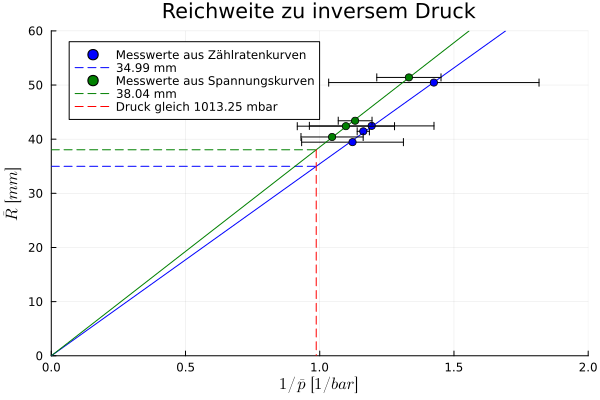

In [18]:
gerade1b(x) = (gerade1(x) - b) * 10^(-3)
gerade2b(x) = (gerade2(x) - b2) * 10^(-3)
reichweite1b = reichweite1 .- b # mm
reichweite2b = reichweite2 .- b2 # mm

druckInverse1scaled = druckInverse1 .* 10^3 # 1/bar
ΔpInverse1scaled = ΔpInverse1 .* 10^3 # Δpscaled = Δp*10^(-3), (1/pscaled)^2 = (1/p)^2*10^6
druckInverse2scaled = druckInverse2 .* 10^3 # 1/bar
ΔpInverse2scaled = ΔpInverse2 .* 10^3

plot(gerade1b, xlims = (0, 2), ylims = (0,60),label = "", color=:blue)
scatter!(druckInverse1scaled, xerr = ΔpInverse1scaled, reichweite1b, markershape=:circle, legend=:topleft,
    label="Messwerte aus Zählratenkurven", title = "Reichweite zu inversem Druck", color =:blue)
k1b = gerade1b(1/1.01325)
Δk1b = sqrt( (Δa*10^(-3)/1.01325)^2 + (a*0.000005/1.01325^2)^2) # Gaußsche Fehlerfortpflanzung
fb(x) = k1b
k1b_rounded = round(k1b, digits = 2)
plot!(fb, [0, 1/1.01325], label = "$k1b_rounded mm", linestyle=:dash, linecolor=:blue)

plot!(gerade2b, label="", color=:green)
scatter!(druckInverse2scaled, xerr = ΔpInverse2scaled, reichweite2b, markershape=:circle,
    label="Messwerte aus Spannungskurven", color=:green)
k2b = gerade2b(1/1.01325)
Δk2b = sqrt( (Δa2*10^(-3)*(1/1.01325))^2 + (a2*0.000005/1.01325^2)^2)
gb(x) = k2b
k2b_rounded = round(k2b, digits = 2)
plot!(gb, [0, 1/1.01325], label = "$k2b_rounded mm", linestyle=:dash, linecolor=:green)

plot!([1/1.01325, 1/1.01325], [k2b, 0], label = "Druck gleich 1013.25 mbar", linestyle=:dash, linecolor=:red)
xlabel!(L"1/\bar{p} \enspace [1/bar]")
ylabel!(L"\bar{R} \enspace [mm]")

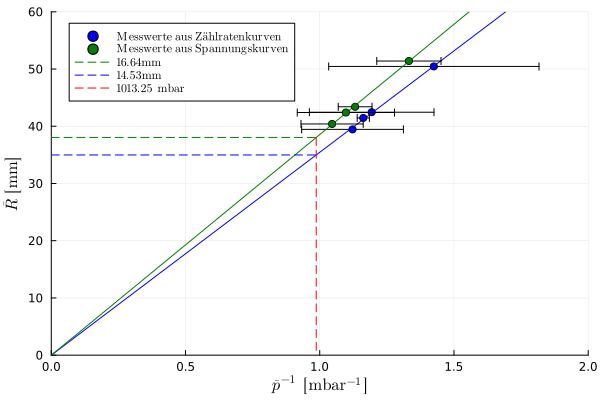

In [19]:
gerade1b(x) = (gerade1(x) - b) * 10^(-3)
gerade2b(x) = (gerade2(x) - b2) * 10^(-3)
reichweite1b = reichweite1 .- b # mm
reichweite2b = reichweite2 .- b2 # mm

druckInverse1scaled = druckInverse1 .* 10^3 # 1/bar
ΔpInverse1scaled = ΔpInverse1 .* 10^3 # Δpscaled = Δp*10^(-3), (1/pscaled)^2 = (1/p)^2*10^6
druckInverse2scaled = druckInverse2 .* 10^3 # 1/bar
ΔpInverse2scaled = ΔpInverse2 .* 10^3

reichweiteDruckVerschobenScaled = plot(gerade1b, xlims = (0, 2), ylims = (0,60),label = "", color=:blue)
scatter!(druckInverse1scaled, xerr = ΔpInverse1scaled, reichweite1b, markershape=:circle, legend=:topleft,
    label=L"\mathrm{Messwerte\ aus\ Zählratenkurven}",
    #title = "Reichweite zu inversem Druck",
    color =:blue)
k1b = gerade1b(1/1.01325)
Δk1b = sqrt( (Δa*10^(-3)/1.01325)^2 + (a*0.000005/1.01325^2)^2) # Gaußsche Fehlerfortpflanzung
fb(x) = k1b
k1b_rounded = round(k1b, digits = 2)

plot!(gerade2b, label="", color=:green)
scatter!(druckInverse2scaled, xerr = ΔpInverse2scaled, reichweite2b, markershape=:circle,
    label=L"\mathrm{Messwerte\ aus\ Spannungskurven}", color=:green)
k2b = gerade2b(1/1.01325)
Δk2b = sqrt( (Δa2*10^(-3)*(1/1.01325))^2 + (a2*0.000005/1.01325^2)^2)
gb(x) = k2b
k2b_rounded = round(k2b, digits = 2)

plot!(gb, [0, 1/1.01325], label = L"%$k2_rounded \mathrm{mm}", linestyle=:dash, linecolor=:green)
plot!(fb, [0, 1/1.01325], label = L"%$k1_rounded \mathrm{mm}", linestyle=:dash, linecolor=:blue)

plot!([1/1.01325, 1/1.01325], [k2b, 0], label = L"1013.25\enspace \mathrm{mbar}", linestyle=:dash, linecolor=:red)
xlabel!(L"\bar{p}^{-1} \enspace [\mathrm{mbar^{-1}}]")
ylabel!(L"\bar{R} \enspace [\mathrm{mm}]")

In [20]:
savefig(reichweiteDruckVerschobenScaled, "../../media/B3.3/reichweiten inverse druecke verschoben skaliert.svg");
savefig(reichweiteDruckVerschobenScaled, "../../media/B3.3/reichweiten inverse druecke verschoben skaliert.pdf");

##### Bragg-Kleemann-Regel zur Bestimmung der Reichweite der $\alpha$-Teilchen in Aluminium

In [21]:
R_A(A, ρ, R_Luft) = 3.2 * 10^(-4) * R_Luft *A^(1/2)/ρ # g/cm^3
ΔR_A(A, ρ, R_Luft, Δρ, ΔR_Luft) = 3.2 * 10^(-4) * sqrt( ( A^(1/2) * R_Luft * Δρ / ρ^2 )^2
    + ( A^(1/2) * ΔR_Luft / ρ )^2 )

ΔR_A (generic function with 1 method)

In [22]:
[R_A(27, 2.7, 34.99), ΔR_A(27, 2.7, 34.99, 0.00005, 1.32)]

2-element Vector{Float64}:
 0.021548251646874673
 0.0008129092769599874

#### Auswertungsteil $-$ 4.3 Massenbremsvermögen

1. mittlere Drücke bestimmen:

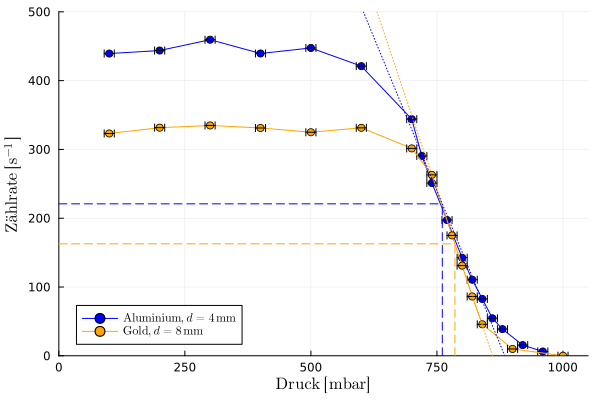

In [23]:
Δp = 10 #mbar
rate_al = [13180/30, 13312/30, 9189/20, 8789/20, 8949/20, 8420/20, 6880/20, 5811/20, 7534/30, 5920/30, 4275/30,
    5529/50, 4959/60, 4905/90, 4652/120, 1864/120, 750/120]
druck_al = [100, 200, 300, 400, 500, 600, 700, 720, 740, 770, 800, 820, 840, 860, 880, 920, 960]

rate_gold = [6463/20, 6632/20, 6696/20, 6623/20, 6499/20, 6628/20, 6029/20, 10519/40, 5250/30, 6551/50, 5172/60, 
    5493/120, 1195/120, 10/120]
druck_gold = [100, 200, 300, 400, 500, 600, 700, 740, 780, 800, 820, 840, 900, 1000]

# Geraden-Fits:
xWerte_al = [700, 720, 740, 770, 800, 820, 840, 860]
yWerte_al = [6880/20, 5811/20, 7534/30, 5920/30, 4275/30, 5529/50, 4959/60, 4905/90]
a_al, b_al, Δa_al, Δb_al = rechnerischeGeradenanpassung(xWerte_al, yWerte_al)
gerade_al(x) = a_al * x + b_al
xWerte_gold = [740, 780, 800, 820, 840]
yWerte_gold = [10519/40, 5250/30, 6551/50, 5172/60, 5493/120]
a_gold, b_gold, Δa_gold, Δb_gold = rechnerischeGeradenanpassung(xWerte_gold, yWerte_gold)
gerade_gold(x) = a_gold * x + b_gold

# mittlere Rate & mittlerer Druck:
mittlereRate_al = (13180/30 + 13312/30 + 9189/20 + 8789/20 + 8949/20 + 8420/20)/(6*2)
mittlereRate_gold = (6463/20 + 6632/20 + 6696/20 + 6623/20 + 6499/20 + 6628/20 + 6029/20)/(7*2)
ΔmittlereRate_al = sqrt( (1/(6*5)) * ( (13180/30 - mittlereRate_al)^2 + (13312/30 - mittlereRate_al)^2 + 
        (9189/20 - mittlereRate_al)^2) + (8789/20 - mittlereRate_al)^2 + (8949/20 - mittlereRate_al)^2 +
    (8420/20 - mittlereRate_al)^2 )
ΔmittlereRate_gold = sqrt( (1/(7*6)) * ( (6463/20 - mittlereRate_gold)^2 + (6632/20 - mittlereRate_gold)^2 + 
        (6696/20 - mittlereRate_gold)^2) + (6623/20 - mittlereRate_gold)^2 + (6499/20 - mittlereRate_gold)^2 +
    (6628/20 - mittlereRate_gold)^2 + (6029/20 - mittlereRate_gold)^2)
mittlererDruck_al = (mittlereRate_al - b_al)/a_al
mittlererDruck_gold = (mittlereRate_gold - b_gold)/a_gold
ΔmittlererDruck_al = sqrt( (ΔmittlereRate_al/a_al)^2 + (Δb_al/a_al)^2 + ((mittlereRate_al - b_al) * Δa_al/a_al)^2 )
ΔmittlererDruck_gold = sqrt( (ΔmittlereRate_gold/a_gold)^2 + (Δb_gold/a_gold)^2 +
    ((mittlereRate_gold - b_gold) * Δa_gold/a_gold)^2 )

# Plot Messwerte:
zählraten = plot(druck_al, rate_al, xerr = Δp, markershape=:circle, label = L"\mathrm{Aluminium}, d = 4\mathrm{\, mm}", legend=:bottomleft,
    ylims=(0, 500), xlims=(0,1050), color=:blue)
plot!(druck_gold, rate_gold, xerr = Δp, markershape=:circle, label = L"\mathrm{Gold}, d = 8\mathrm{\, mm}", color=:orange)

# Plot Geraden-Fits:
plot!(gerade_al, linestyle=:dot, linecolor=:blue, label="")
plot!(gerade_gold, linestyle=:dot, linecolor=:orange, label="")

# Plot mittlere Raten:
plot!([0, mittlererDruck_al], [mittlereRate_al, mittlereRate_al], linestyle=:dash, linecolor=:blue, label="")
plot!([0, mittlererDruck_gold], [mittlereRate_gold, mittlereRate_gold], linestyle=:dash, linecolor=:orange, label="")

# Plot mittlere Drücke:
plot!([mittlererDruck_al, mittlererDruck_al], [0, mittlereRate_al], linestyle=:dash, linecolor=:blue, label="")
plot!([mittlererDruck_gold, mittlererDruck_gold], [0, mittlereRate_gold], linestyle=:dash, linecolor=:orange, label="")

# Other:
xlabel!(L"\mathrm{Druck} \ [\mathrm{mbar}]")
ylabel!(L"\mathrm{Zählrate} \ [\mathrm{s^{-1}}]")

In [24]:
savefig(zählraten, "../../media/B3.3/zaehlraten.svg");
savefig(zählraten, "../../media/B3.3/zaehlraten.pdf");

2. Zählrate-inverser Druck Gerade aufstellen, dabei Offset aus letztem Auswertungsteil auf Abstand von Al/Gold draufrechnen

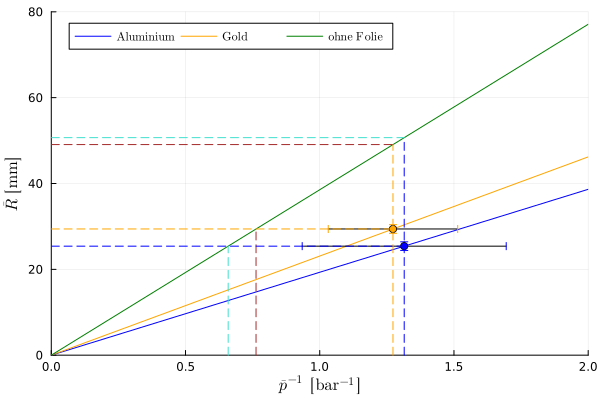

In [25]:
# Offset aus letztem Auswertungsteil (Aus Spannungskurven):
offset = -21.40247557390292 # mm
Δoffset = 1.0054388075769292

# Fehler für 1/mittlererDruck:
ΔdruckInvers_al = 10^3 * ΔmittlererDruck_al / mittlererDruck_al^2
ΔdruckInvers_gold = 10^3 * ΔmittlererDruck_gold / mittlererDruck_gold^2

# Geraden aus letztem Auswertungsteil (1 = aus Zählratenkurven, 2 = aus Spannungskurven => 2 bevorzugt):
a_ohneFolie_1 = 35450.239259055146 # mm*mbar
a_ohneFolie_2 = 38548.92812793463
Δa_ohneFolie_1 = 1328.9550799385954
Δa_ohneFolie_2 = 869.0480375127897
gerade_ohneFolie_1(x) = a_ohneFolie_1 * x * 10^(-3)
gerade_ohneFolie_2(x) = a_ohneFolie_2 * x * 10^(-3)

mittlererAbstand_al = 4 - offset # mm = R_1_al
mittlererAbstand_gold = 8 - offset # mm = R_1_gold
# ΔmittlererAbstand_x = Δoffset
p_1_al = 10^(-3)*a_ohneFolie_2/mittlererAbstand_al # bar
p_1_gold = 10^(-3)*a_ohneFolie_2/mittlererAbstand_gold # bar
Δp_1_al = sqrt( (Δa_ohneFolie_2/mittlererAbstand_al)^2 + (a_ohneFolie_2 * Δoffset/mittlererAbstand_al^2)^2 ) # mbar
Δp_1_gold = sqrt( (Δa_ohneFolie_2/mittlererAbstand_gold)^2 + (a_ohneFolie_2 * Δoffset/mittlererAbstand_gold^2)^2 ) # mbar

# Gerade aus 2 Punkten: 1. (0,0) 2. (1/mittlererDruck_x, mittlererAbstand_x):
# (b durch Offset-Ausgleich gleich 0)
a_al_2 = (mittlererAbstand_al-0) / (10^3/mittlererDruck_al - 0)
a_gold_2 = (mittlererAbstand_gold-0) / (10^3/mittlererDruck_gold - 0)
gerade_al_2(x) = a_al_2 * x
gerade_gold_2(x) = a_gold_2 * x

# Plot:
reichweite = plot(gerade_al_2, xlims = (0, 10^3/500), ylims=(0,80), label=L"\mathrm{Aluminium}", legend=:topleft, linecolor=:blue,
    legend_columns = 3)
plot!(gerade_gold_2, label=L"\mathrm{Gold}", linecolor=:orange)
scatter!([10^3/mittlererDruck_al], [mittlererAbstand_al], yerr = Δoffset, xerr = ΔdruckInvers_al, 
    label="", markercolor=:blue)
scatter!([10^3/mittlererDruck_gold], [mittlererAbstand_gold], yerr = Δoffset, xerr = ΔdruckInvers_gold,
    label="", markercolor=:orange)

plot!(gerade_ohneFolie_2, label = L"\mathrm{ohne\ Folie}", linecolor=:green)

# Plot dashed lines:
# vertical:
plot!([10^3/mittlererDruck_al,10^3/mittlererDruck_al], [0, gerade_ohneFolie_2(10^3/mittlererDruck_al)], linestyle=:dash,
    linecolor=:blue, label="")
plot!([10^3/mittlererDruck_gold,10^3/mittlererDruck_gold], [0, gerade_ohneFolie_2(10^3/mittlererDruck_gold)],
    linestyle=:dash, linecolor=:orange, label="")
plot!([1/p_1_al, 1/p_1_al],
    [0, gerade_ohneFolie_2(1/p_1_al)],
    linestyle=:dash, linecolor=:turquoise, label="")
plot!([1/p_1_gold, 1/p_1_gold],
    [0, gerade_ohneFolie_2(1/p_1_gold)],
    linestyle=:dash, linecolor=:brown, label="")

# horizontal:
plot!([0, 10^3/mittlererDruck_al], [mittlererAbstand_al, mittlererAbstand_al],
    linestyle=:dash, linecolor=:blue, label="")
plot!([0, 10^3/mittlererDruck_gold], [mittlererAbstand_gold, mittlererAbstand_gold],
    linestyle=:dash, linecolor=:orange, label="")
plot!([0, 10^3/mittlererDruck_al], [gerade_ohneFolie_2(10^3/mittlererDruck_al),
        gerade_ohneFolie_2(10^3/mittlererDruck_al)], linestyle=:dash, linecolor=:turquoise, label="")
plot!([0, 10^3/mittlererDruck_gold], [gerade_ohneFolie_2(10^3/mittlererDruck_gold),
        gerade_ohneFolie_2(10^3/mittlererDruck_gold)], linestyle=:dash, linecolor=:brown, label="")

xlabel!(L"\bar{p}^{-1} \enspace [\mathrm{bar^{-1}}]")
ylabel!(L"\bar{R} \enspace [\mathrm{mm}]")

In [26]:
savefig(reichweite, "../../media/B3.3/reichweiten inverse druecke mit Folien.svg");
savefig(reichweite, "../../media/B3.3/reichweiten inverse druecke mit Folien.pdf");

2. Dichten aus Drücken bestimmen:

In [27]:
ρ_0 = 1.2250 # kg/m^3
Δρ_0 = 0.00005 # kg/m^3
p_0 = 1013.25 # mbar
Δp_0 = 0.005 # mbar
ρ(p) = p * ρ_0/p_0
Δρ(p, Δp) = sqrt( (ρ_0*Δp/p_0)^2 + (p*Δρ_0/p_0)^2 + (p*ρ_0*Δp_0/p_0^2)^2 )

Δρ (generic function with 1 method)

In [28]:
# Gold, p_1
[ρ(1311.08), Δρ(1311.08, 53.70)]

2-element Vector{Float64}:
 1.585070811744387
 0.06492231249993045

In [29]:
# ALuminium p_1
[ρ(1517.53), Δρ(1517.53, 69.12)]

2-element Vector{Float64}:
 1.8346649395509502
 0.0835648008825426

In [30]:
# Gold p_2
[ρ(785.66), Δρ(785.66, 148.83)]

2-element Vector{Float64}:
 0.9498480138169257
 0.1799326467248224

In [31]:
# Aluminium p_2
[ρ(760.65), Δρ(760.65, 219.86)]

2-element Vector{Float64}:
 0.9196113989637306
 0.2658065657286734

3. Massenbremsvermögen bestimmen:

In [32]:
ρ_gold = 19.32 * 10^3 # kg/m^3
Δρ_gold = 0.005 * 10^3 # kg/m^3
d_gold = 2.50 * 10^(-6) # m
Δd_gold = 0.25 * 10^(-6) # m

ρ_alu = 2.6989 * 10^3 # kg/m^3
Δρ_alu = 0.00005 * 10^3 # kg/m^3
Q_alu = 0.78
ΔQ_alu = 0.04

Q_F(ρ_1, ρ_2, R_1, ρ_F, d_F) = (ρ_1 - ρ_2) * R_1 / (ρ_F * d_F)
ΔQ_F(Q, ρ_1, ρ_2, R_1, ρ_F, d_F, Δρ_1, Δρ_2, ΔR_1, Δρ_F, Δd_F) = Q * sqrt( (Δρ_1^2 + Δρ_2^2)/(ρ_1-ρ_2)^2 +
    (ΔR_1/R_1)^2 + (Δρ_F/ρ_F)^2 + (Δd_F/d_F)^2 )

d_F(ρ_1, ρ_2, R_1, ρ_F, Q_F) = (ρ_1 - ρ_2) * R_1 / (ρ_F * Q_F)
Δd_F(d, ρ_1, ρ_2, R_1, ρ_F, Q_F, Δρ_1, Δρ_2, ΔR_1, Δρ_F, ΔQ_F) = d * sqrt( (Δρ_1^2 + Δρ_2^2)/(ρ_1-ρ_2)^2 +
    (ΔR_1/R_1)^2 + (Δρ_F/ρ_F)^2 + (ΔQ_F/Q_F)^2 )

Δd_F (generic function with 1 method)

In [33]:
# Massenbremsvermögen Gold zu Luft:
Q_gold_luft = Q_F(1.56, 0.93, 29.40*10^(-3), ρ_gold, d_gold)
ΔQ_gold_luft = ΔQ_F(Q_gold_luft, 1.56, 0.93, 29.40*10^(-3), ρ_gold, d_gold, 0.06, 0.18, 1.01*10^(-3), Δρ_gold, Δd_gold)
[Q_gold_luft, ΔQ_gold_luft]

2-element Vector{Float64}:
 0.38347826086956527
 0.12240298971402178

In [34]:
# Dicke Aluminiumfolie:
d_alu = d_F(1.80, 0.90, 25.40*10^(-3), ρ_alu, Q_alu)
Δd_alu = Δd_F(d_alu, 1.80, 0.90, 25.40*10^(-3), ρ_alu, Q_alu, 0.08, 0.26, 1.01*10^(-3), Δρ_alu, ΔQ_alu)
[d_alu*10^6, Δd_alu*10^6]

2-element Vector{Float64}:
 10.859124942640447
  3.3570160960054314

In [35]:
# Massenbremsvermögen von Gold zu ALuminium:
Q_gold_alu = Q_gold_luft/Q_alu
ΔQ_gold_alu = sqrt( (ΔQ_gold_luft/Q_alu)^2 + (Q_gold_luft*ΔQ_alu/Q_alu^2)^2 )
[Q_gold_alu, ΔQ_gold_alu]

2-element Vector{Float64}:
 0.49163879598662213
 0.15893933557586215